In [1]:
import wget
import os
from zipfile import ZipFile
import pandas as pd

In [2]:
url_data = "http://187.191.75.115/gobmx/salud/datos_abiertos/datos_abiertos_covid19.zip"
url_dict = "http://187.191.75.115/gobmx/salud/datos_abiertos/diccionario_datos_covid19.zip"
curr_dir = os.getcwd()
file_data = "datos_abiertos_covid19.zip"

if "diccionario_datos_covid19.zip" not in os.listdir():
    wget.download(url_dict, os.path.join(curr_dir, "diccionario_datos_covid19.zip" ))

# elimina archivos previos
for file in os.listdir():
    if ".csv" in file or file == file_data:
        os.remove(file)
# descarga 
wget.download(url_data, os.path.join(curr_dir,file_data))

# descompresión
with ZipFile(file_data, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

File Name                                             Modified             Size
200414COVID19MEXICO.csv                        2020-04-14 18:11:30      5015684
Extracting all the files now...
Done!


In [3]:
# identifica el archivo con datos
for file in os.listdir():
    if ".csv" in file:
        name_file = file
print(name_file)
df = pd.read_csv(name_file, encoding = "latin-1")

200414COVID19MEXICO.csv


In [4]:
df.head()

,FECHA_ACTUALIZACION,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,FECHA_INGRESO,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-04-14,2,9,15,1,15,15,37,2,2020-04-09,...,2,2,2,2,2,1,99,99,97,1
1,2020-04-14,2,9,28,2,16,28,32,1,2020-04-06,...,2,2,2,2,1,1,99,99,97,97
2,2020-04-14,1,12,15,2,15,15,31,2,2020-04-06,...,2,2,2,2,2,2,99,99,97,2
3,2020-04-14,1,4,2,2,21,2,4,2,2020-04-02,...,2,1,2,2,99,2,99,MÃ©xico,97,2
4,2020-04-14,1,12,9,2,99,9,12,2,2020-03-28,...,2,2,2,2,2,1,99,MÃ©xico,97,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41593 entries, 0 to 41592
Data columns (total 34 columns):
FECHA_ACTUALIZACION    41593 non-null object
ORIGEN                 41593 non-null int64
SECTOR                 41593 non-null int64
ENTIDAD_UM             41593 non-null int64
SEXO                   41593 non-null int64
ENTIDAD_NAC            41593 non-null int64
ENTIDAD_RES            41593 non-null int64
MUNICIPIO_RES          41593 non-null int64
TIPO_PACIENTE          41593 non-null int64
FECHA_INGRESO          41593 non-null object
FECHA_SINTOMAS         41593 non-null object
FECHA_DEF              41593 non-null object
INTUBADO               41593 non-null int64
NEUMONIA               41593 non-null int64
EDAD                   41593 non-null int64
NACIONALIDAD           41593 non-null int64
EMBARAZO               41593 non-null int64
HABLA_LENGUA_INDI      41593 non-null int64
DIABETES               41593 non-null int64
EPOC                   41593 non-null int64
ASMA   

In [6]:
df.columns

Index(['FECHA_ACTUALIZACION', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM', 'SEXO',
       'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDI', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_CON',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [7]:
df["FECHA_DEF"].unique()

array(['9999-99-99', '2020-04-13', '2020-03-26', '2020-04-09',
       '2020-03-28', '2020-04-11', '2020-04-10', '2020-04-02',
       '2020-03-30', '2020-04-08', '2020-04-05', '2020-03-18',
       '2020-04-01', '2020-04-03', '2020-02-10', '2020-04-12',
       '2020-04-07', '2020-04-04', '2020-03-31', '2020-04-06',
       '2020-03-25', '2020-04-14', '2020-03-29', '2020-03-24',
       '2020-03-27', '2020-03-20', '2020-03-22', '2020-03-17',
       '2020-03-09', '2020-01-13', '2020-03-23'], dtype=object)

In [8]:
df_fallecidos = df[df["FECHA_DEF"] != "9999-99-99"]
df_fallecidos.shape

(855, 34)

In [9]:
df["FECHA_SINTOMAS"].unique()

array(['2020-03-28', '2020-04-04', '2020-03-26', '2020-03-17',
       '2020-04-05', '2020-03-01', '2020-03-31', '2020-03-25',
       '2020-04-06', '2020-03-19', '2020-03-04', '2020-03-18',
       '2020-03-15', '2020-03-20', '2020-04-01', '2020-03-30',
       '2020-03-14', '2020-03-13', '2020-04-13', '2020-04-09',
       '2020-04-03', '2020-03-23', '2020-03-21', '2020-03-29',
       '2020-03-24', '2020-04-08', '2020-04-12', '2020-03-10',
       '2020-04-07', '2020-03-03', '2020-03-22', '2020-03-09',
       '2020-03-27', '2020-03-11', '2020-03-16', '2020-04-11',
       '2020-04-10', '2020-04-02', '2020-03-12', '2020-03-07',
       '2020-02-29', '2020-04-14', '2020-02-25', '2020-03-02',
       '2020-02-20', '2020-02-26', '2020-01-30', '2020-02-23',
       '2020-03-08', '2020-03-05', '2020-03-06', '2020-01-06',
       '2020-02-27', '2020-02-05', '2020-02-08', '2020-01-29',
       '2020-02-04', '2020-02-10', '2020-02-11', '2020-02-12',
       '2020-01-13', '2020-02-28', '2020-01-08', '2020-

In [11]:
df["FECHA_SINTOMAS"] =pd.to_datetime(df["FECHA_SINTOMAS"], format = "%Y-%m-%d")
df["FECHA_INGRESO"] =pd.to_datetime(df["FECHA_INGRESO"], format = "%Y-%m-%d")
df["FECHA_ACTUALIZACION"] =pd.to_datetime(df["FECHA_ACTUALIZACION"], format = "%Y-%m-%d")

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41593 entries, 0 to 41592
Data columns (total 34 columns):
FECHA_ACTUALIZACION    41593 non-null datetime64[ns]
ORIGEN                 41593 non-null int64
SECTOR                 41593 non-null int64
ENTIDAD_UM             41593 non-null int64
SEXO                   41593 non-null int64
ENTIDAD_NAC            41593 non-null int64
ENTIDAD_RES            41593 non-null int64
MUNICIPIO_RES          41593 non-null int64
TIPO_PACIENTE          41593 non-null int64
FECHA_INGRESO          41593 non-null datetime64[ns]
FECHA_SINTOMAS         41593 non-null datetime64[ns]
FECHA_DEF              41593 non-null object
INTUBADO               41593 non-null int64
NEUMONIA               41593 non-null int64
EDAD                   41593 non-null int64
NACIONALIDAD           41593 non-null int64
EMBARAZO               41593 non-null int64
HABLA_LENGUA_INDI      41593 non-null int64
DIABETES               41593 non-null int64
EPOC                   4159

In [15]:
df["FECHA_SINTOMAS"].describe()

count                   41593
unique                    102
top       2020-04-01 00:00:00
freq                     2012
first     2020-01-01 00:00:00
last      2020-04-14 00:00:00
Name: FECHA_SINTOMAS, dtype: object

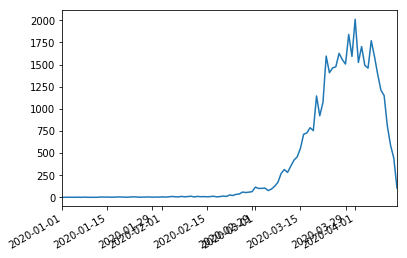

In [25]:
%matplotlib inline
df["FECHA_SINTOMAS"].value_counts().plot()

In [26]:
df["FECHA_SINTOMAS"].value_counts()

2020-04-01    2012
2020-03-30    1841
2020-04-06    1770
2020-04-03    1704
2020-03-27    1627
2020-03-23    1596
2020-04-07    1592
2020-03-31    1592
2020-03-28    1557
2020-04-02    1524
2020-03-29    1506
2020-04-04    1492
2020-03-26    1476
2020-03-25    1462
2020-04-05    1460
2020-03-24    1408
2020-04-08    1390
2020-04-09    1212
2020-04-10    1149
2020-03-20    1146
2020-03-22    1073
2020-03-21     921
2020-04-11     804
2020-03-18     787
2020-03-19     754
2020-03-17     728
2020-03-16     713
2020-04-12     588
2020-03-15     554
2020-03-14     458
              ... 
2020-01-24       5
2020-02-11       5
2020-01-19       5
2020-01-28       5
2020-02-06       5
2020-01-13       5
2020-01-15       4
2020-01-27       4
2020-01-22       4
2020-01-30       4
2020-01-14       3
2020-01-26       3
2020-01-31       3
2020-01-08       3
2020-01-20       3
2020-02-02       3
2020-01-25       2
2020-01-03       2
2020-01-16       2
2020-01-29       2
2020-01-21       2
2020-01-06  